<a href="https://colab.research.google.com/github/Harshnagwani123/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction_%E2%80%93_Model_Tuning_%26_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


In [6]:
df = pd.read_csv("/content/cleaned_merged_heart_dataset.csv")

X = df.drop("target", axis=1)
y = df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000))
])

# 5-Fold CV
cv_scores = cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring="accuracy")
print("Logistic Regression CV Accuracy:", cv_scores.mean())


Logistic Regression CV Accuracy: 0.7490066225165564


In [8]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10, None]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF CV Score:", grid_rf.best_score_)

# Evaluate on test
y_pred = grid_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best RF Params: {'max_depth': None, 'n_estimators': 200}
Best RF CV Score: 0.9675496688741723
Test Accuracy: 0.9841269841269841


ADABOOST

In [9]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.7936507936507936


XGBOOST

In [10]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9761904761904762


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:48:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                            Accuracy
Logistic Regression (CV)    0.749007
Random Forest (GridSearch)  0.967550
AdaBoost                    0.793651
XGBoost                     0.976190


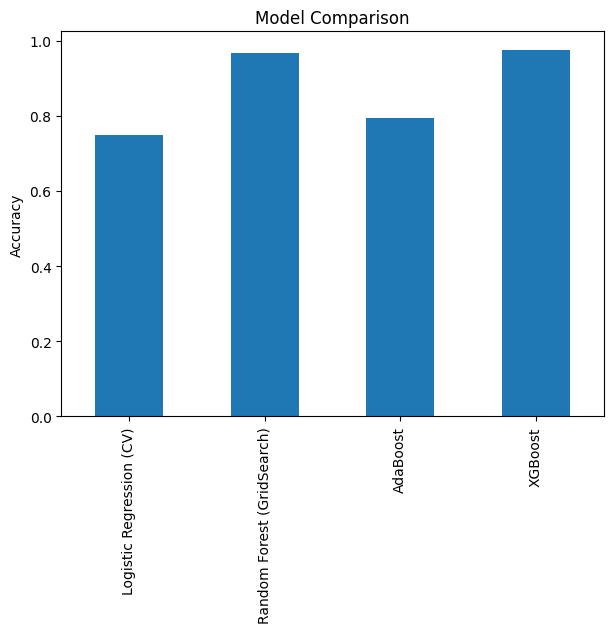

In [11]:
results = {
    "Logistic Regression (CV)": cv_scores.mean(),
    "Random Forest (GridSearch)": grid_rf.best_score_,
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

results_df = pd.DataFrame(results.values(), index=results.keys(), columns=["Accuracy"])
print(results_df)

# Plot
results_df.plot(kind="bar", legend=False, figsize=(7,5))
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()
